# Postfix To NFA

In [1]:
import shunting_yard
from regex2NFA import State,NFA
from NFA2DFA import DFA
from minDFA import MinimizedDFA
from IPython.display import Image

# Visualization Function

In [7]:
from graphviz import Digraph

def visualize_NFA(nfa):

  gra = Digraph(graph_attr={'rankdir':'LR'})


  for s in nfa.states:
      if(s.name == nfa.start.name):
        gra.node("", _attributes={'shape' : 'none'})
        gra.edge("", s.name)
      if(s.name == nfa.accepting.name):
        gra.node(s.name, _attributes={'peripheries' : '2'})
      else:
        gra.node(s.name)

  edge_set = set()
  for state in nfa.states:
    for edge in state.out_edges:

        destination = edge.dest
        edge_key = (state.name, destination.name, edge.label)
        if edge_key not in edge_set:
            edge_set.add(edge_key)
            gra.edge(state.name, destination.name, label=edge.label)

  gra.format = 'png'
  gra.render('NFA', view = True)
  return gra.source

In [11]:
from graphviz import Digraph

def visualize_transition_dict(transition_dict):
    gra = Digraph(graph_attr={'rankdir': 'LR'})

    start_state = transition_dict["startingState"]
    gra.node("", _attributes={'shape': 'none'})
    gra.edge("", start_state)

    for state_name, transitions in transition_dict.items():
        if state_name == "startingState":
            continue

        is_terminating = transitions.get("isTerminatingState", False)

        if is_terminating:
            gra.node(state_name, _attributes={'peripheries': '2'})
        else:
            gra.node(state_name)

        for symbol, target_state in transitions.items():
            if symbol != "isTerminatingState":
                gra.edge(state_name, target_state, label=symbol)

    gra.format = 'png'
    gra.render('minDFA', view=True)
    return gra.source

# NFA To DFA

In [14]:
postfix = shunting_yard.infix2postfix('a+b')
nfa = NFA.postfix2NFA(postfix)
nfa.to_json()

dfa = DFA()
transitions,renamed_transitions=dfa.NFA2DFA(nfa)
dfa.to_json(transitions,renamed_transitions)

minimized_dfa = MinimizedDFA(dfa, renamed_transitions)
minimized_transitions = minimized_dfa.minimize()
minimized_dfa.to_json()


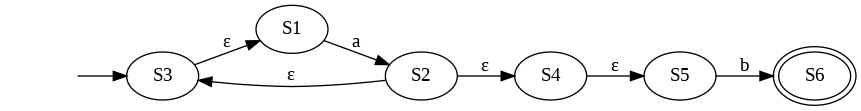

In [9]:
visualize_NFA(nfa)
Image(filename='NFA.png')

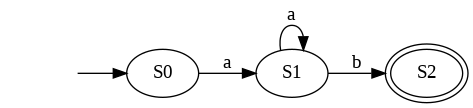

In [15]:
visualize_transition_dict(minimized_transitions)
Image(filename='minDFA.png')